In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('ad_10000records.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [4]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

In [5]:
label_encoders = {}
categorical_columns = ['Gender', 'Country', 'Ad Topic Line', 'City']

In [6]:
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
df.drop(columns=['Timestamp'], inplace=True)

In [8]:
X = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
scaler = StandardScaler()
numerical_columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'Day', 'Month']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [11]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Hour,Day,Month
0,62.26,32.0,69481.85,172.83,96,234,1,174,0,21,9,6
1,41.73,31.0,61840.26,207.17,301,460,1,166,0,17,16,1
2,44.40,30.0,57877.15,172.83,484,379,0,71,0,10,29,6
3,59.88,28.0,56180.93,207.17,24,269,0,205,0,14,21,6
4,49.21,30.0,54324.73,201.58,484,495,0,149,1,10,21,7


In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

SVC()

In [13]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 ... 0 1 0]


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score,r2_score

In [15]:
param_grid = {
    'C': [0.1, 1, 10],             # Fewer values for regularization parameter
    'kernel': ['rbf'],   # Fewer kernel types
    'gamma': [0.01, 0.1],          # Fewer gamma values
    'degree': [3]                  # Only include for 'poly' kernel
}

In [18]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

In [19]:
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score: 0.729125


In [20]:
best_params = grid_search.best_params_

In [21]:
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy:{accuracy*100:.2f}%')

Accuracy:72.20%


In [22]:
r2_score(y_test,y_pred)

-0.11232146090220096

In [23]:
classification_report_str = classification_report(y_test, y_pred)

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

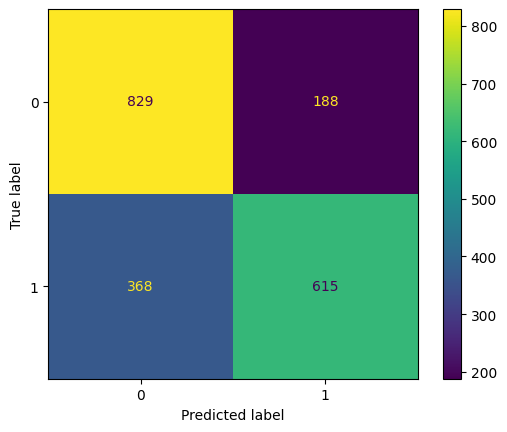

In [25]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [26]:
import matplotlib.pyplot as plt
import numpy as np

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1017
           1       0.77      0.63      0.69       983

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.72      0.72      2000



In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.722
